# Veri Düzenleme: Ekleme, Birleştirme ve Yeniden Şekillendirme

    Birçok uygulamada, veriler bir dizi dosya veya veri tabanına yayılabilir veya analiz edilmesi kolay olmayan bir biçimde düzenlenebilir.

# 8.1 Hiyerarşik İndeksleme
    Hiyerarşik indeksleme, bir eksende birden çok (iki veya daha fazla) indeks seviyesine sahip olmanızı sağlayan önemli bir pandas özelliğidir. Biraz soyut olarak, daha düşük boyutlu bir formda daha yüksek boyutlu verilerle çalışmanız için bir yol sağlar.

In [1]:
import pandas as pd
import numpy as np
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1,2,3,1,3,1,2,2,3]])

In [2]:
data

a  1   -0.279672
   2   -0.376812
   3    0.966134
b  1   -1.046658
   3    1.004824
c  1   -0.637444
   2    0.356900
d  2    0.575774
   3   -0.882728
dtype: float64

    Gördüğünüz şey, dizini MultiIndex olan bir Serinin güzel bir görünümüdür. Dizin ekranındaki "boşluklar", "doğrudan yukarıdaki etiketi kullanın" anlamına gelir.

In [3]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

    Hiyerarşik olarak indekslenmiş bir nesneyle, verilerin alt kümelerini kısaca seçmenize olanak tanıyan kısmi indeksleme mümkündür.

In [4]:
data['b']

1   -1.046658
3    1.004824
dtype: float64

In [5]:
data['b':'c']

b  1   -1.046658
   3    1.004824
c  1   -0.637444
   2    0.356900
dtype: float64

In [6]:
data.loc[['b', 'd']]

b  1   -1.046658
   3    1.004824
d  2    0.575774
   3   -0.882728
dtype: float64

    "İç" seviyeden bile seçim mümkündür.

In [7]:
data.loc[:, 2]

a   -0.376812
c    0.356900
d    0.575774
dtype: float64

    Hiyerarşik indeksleme, verileri yeniden şekillendirmede ve bir pivot tablo oluşturmak gibi grup tabanlı işlemlerde önemli bir rol oynar. Örneğin, unstack yöntemini kullanarak verileri DataFrame'e yeniden düzenleyebilirsiniz.

In [8]:
data.unstack()

,1,2,3
a,-0.279672,-0.376812,0.966134
b,-1.046658,NaN,1.004824
c,-0.637444,0.356900,NaN
d,NaN,0.575774,-0.882728


    Unstack işlevinin tersi işlemi stack.

In [9]:
data.unstack().stack()

a  1   -0.279672
   2   -0.376812
   3    0.966134
b  1   -1.046658
   3    1.004824
c  1   -0.637444
   2    0.356900
d  2    0.575774
   3   -0.882728
dtype: float64

    Bir DataFrame ile, her iki eksen hiyerarşik bir dizine sahip olabilir.

In [10]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])

In [11]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

    Hiyerarşik seviyelerin isimleri olabilir (dizeler veya herhangi bir Python nesnesi olarak), bunlar konsol çıktısında görünecektir.

In [12]:
frame.index.names = ['key1', 'key2']

In [13]:
frame.columns.names = ['state', 'color']

In [14]:
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

    Kısmi sütun indeksleme ile benzer şekilde sütun gruplarını seçebilirsiniz.

In [15]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

    Bir MultiIndex kendi başına oluşturulabilir ve daha sonra yeniden kullanılabilir; Önceki DataFrame'deki düzey adlarıyla sütunlar şu şekilde oluşturulabilir:
        
        MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']],
                           names=['state', 'color'])

# Reordering ve Seviyeleri Sıralama
    Bazen, bir eksendeki seviyelerin sırasını yeniden düzenlemeniz veya verileri belirli bir seviyedeki değerlere göre sıralamanız gerekecektir. Takas seviyesi, iki seviye numarası veya adı alır ve seviyeleri değiştirilmiş yeni bir nesne döndürür (ancak veriler başka türlü değiştirilmez).

In [16]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

    sort_index ise verileri yalnızca tek bir düzeydeki değerleri kullanarak sıralar. Düzeyleri değiştirirken, sonucun sözlükbilimsel olarak belirtilen düzeye göre sıralanması için sort_index'in kullanılması da nadir değildir.

In [17]:
frame.sort_index(level=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [18]:
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

# Seviyeye Göre Özet İstatistikler
    DataFrame ve Serilerdeki birçok tanımlayıcı ve özet istatistik, belirli bir eksende toplamak istediğiniz seviyeyi belirtebileceğiniz bir seviye seçeneğine sahiptir. Yukarıdaki DataFrame'i düşünün; aşağıdaki gibi satırlarda veya sütunlarda seviyeye göre toplayabiliriz:

In [19]:
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [20]:
frame.sum(level='color', axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

# DataFrame'in sütunlarıyla dizine ekleme
    Satır dizini olarak bir DataFrame'den bir veya daha fazla sütun kullanmak istemeniz alışılmadık bir durum değildir; alternatif olarak, satır dizinini DataFrame’in sütunlarına taşımak isteyebilirsiniz. Aşağıda bir DataFrame örneği verilmiştir.

In [21]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                             'two', 'two'],
                      'd':[0,1,2,0,1,2,3]})

In [22]:
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


    DataFrame’in set_index fonksiyonu, dizin olarak bir veya daha fazla sütununu kullanarak yeni bir DataFrame oluşturur.

In [23]:
frame2 = frame.set_index(['c', 'd'])

In [24]:
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

    Varsayılan olarak sütunlar DataFrame'den kaldırılır, ancak bunları içerde bırakabilirsiniz.

In [25]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

    reset_index ise set_index'in tersini yapar; hiyerarşik dizin seviyeleri sütunlara taşınır.

In [26]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


# 8.2 Combining and Merging Datasets
    Pandas nesnelerinde bulunan veriler, birkaç yolla bir araya getirilebilir:
    • pandas.merge, DataFrame'lerdeki satırları bir veya daha fazla anahtara göre bağlar. Bu, veritabanı birleştirme işlemlerini gerçekleştirir
    • pandas.concat, bir eksen boyunca nesneleri birleştirir veya "yığınlar".
    • comb_first örnek yöntemi, bir nesnedeki eksik değerleri diğerinden gelen değerlerle doldurmak için çakışan verileri birbirine eklemeyi sağlar.

# Veritabanı Tarzı DataFrame Birleştirmeleri
    Merge veya join işlemleri, bir veya daha fazla anahtar kullanarak satırları birbirine bağlayarak veri kümelerini birleştirir. Bu işlemler ilişkisel veritabanları için merkezidir.

In [27]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})

In [28]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})

In [29]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [30]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


    Bu, bire çok birleşim örneğidir; df1'deki verilerin a ve b olarak etiketlenmiş birden çok satırı varken, df2'nin anahtar sütunundaki her değer için yalnızca bir satırı vardır.

In [31]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


    Hangi sütuna join yapılacağını belirtmeyi unutmayın. Bu bilgi belirtilmemişse, join, anahtar olarak üst üste binen sütun adlarını kullanır.

In [32]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


    Her nesnede sütun adları farklıysa, bunları ayrı ayrı belirtebilirsiniz.

In [33]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})

In [34]:
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})

In [35]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


    Sonuçta 'c' ve 'd' değerlerinin ve ilişkili verilerin eksik olduğunu fark edebilirsiniz. Varsayılan olarak join, bir 'iç' birleştirme yapar; sonuçtaki anahtarlar kesişim veya her iki tabloda da bulunan ortak kümedir. Diğer olası seçenekler "sol", "sağ" ve "dış" tır. Dış join, hem sol hem de sağ birleştirmelerin uygulanmasının etkisini birleştirerek tuşların birleşimini alır.

In [36]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


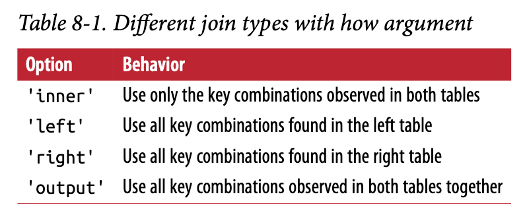

In [37]:
from IPython.display import Image
Image("img/picture51.png")

    Çoktan çoğa birleştirme, sezgisel olmasa da iyi tanımlanmış bir davranışa sahiptir. İşte bir örnek:

In [38]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})

In [39]:
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})

In [40]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [41]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [42]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


    Çoktan çoğa birleşimler, satırların Kartezyen çarpımını oluşturur. Soldaki DataFrame'de üç 'b' satırı ve sağdaki iki 'b' satırı olduğu için, sonuçta altı 'b' satırı vardır. Birleştirme yöntemi yalnızca sonuçta görünen farklı anahtar değerlerini etkiler.

In [43]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


    Birden çok anahtarla birleştirmek için sütun adları listesini iletin.

In [44]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})

In [45]:
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})

In [46]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


    Birleştirme yönteminin seçimine bağlı olarak sonuçta hangi tuş kombinasyonlarının görüneceğini belirlemek için, çoklu anahtarları tek bir birleştirme anahtarı olarak kullanılacak bir tuple dizisi oluşturuyor olarak düşünün (aslında bu şekilde uygulanmamış olsa bile).

    Birleştirme işlemlerinde dikkate alınması gereken son bir konu, çakışan sütun adlarının işlenmesidir. Çakışmayı manuel olarak ele alabilseniz de (eksen etiketlerini yeniden adlandırmayla ilgili önceki bölüme bakın), birleştirme, sol ve sağ DataFrame nesnelerindeki çakışan adlara eklenecek dizeleri belirtmek için bir sonek seçeneğine sahiptir.

In [47]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [48]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


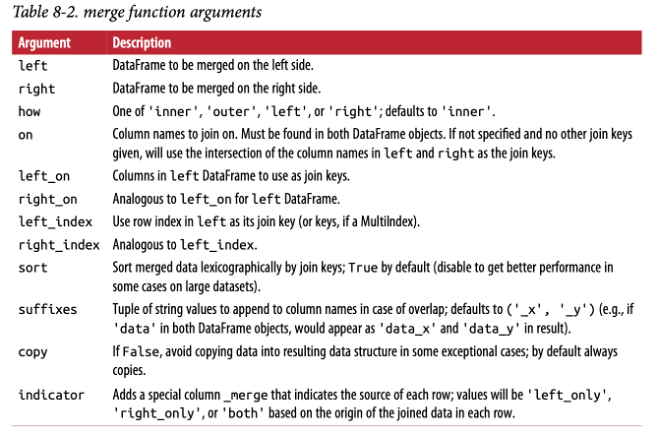

In [49]:
Image("img/picture52.png")

# Endekste Birleştirme
    Bazı durumlarda, DataFrame'deki birleştirme anahtar (lar) ı, dizininde bulunur. Bu durumda, dizinin birleştirme anahtarı olarak kullanılması gerektiğini belirtmek için left_index = True veya right_index = True (veya her ikisini de) iletebilirsiniz.

In [50]:
import pandas as pd
import numpy as np
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})

In [51]:
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [52]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [53]:
right1

,group_val
a,3.5
b,7.0


In [54]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


    Varsayılan birleştirme yöntemi birleştirme anahtarlarını kesiştirmek olduğundan, bunun yerine bunların birleşimini bir dış birleştirmeyle oluşturabilirsiniz.

In [55]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


    Hiyerarşik olarak dizine alınmış verilerde, dizine birleştirme örtük olarak çok anahtarlı bir birleştirme olduğu için işler daha karmaşıktır.

In [56]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})

In [57]:
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])

In [58]:
lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [59]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

    Bu durumda, bir liste olarak birleştirilecek birden çok sütunu belirtmeniz gerekir (how='outer' ile yinelenen dizin değerlerinin işlenmesine dikkat edin).

In [60]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4,5
0,Ohio,2000,0.0,6,7
1,Ohio,2001,1.0,8,9
2,Ohio,2002,2.0,10,11
3,Nevada,2001,3.0,0,1


In [61]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


    Birleştirmenin her iki tarafının dizinlerini kullanmak da mümkündür.

In [62]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])

In [63]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])

In [64]:
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [65]:
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [66]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


    DataFrame, dizine göre birleştirme için uygun bir birleştirme örneğine sahiptir. Aynı veya benzer dizinlere sahip ancak üst üste binmeyen sütunlara sahip birçok DataFrame nesnesini birleştirmek için de kullanılabilir. Önceki örnekte şunları yazabilirdik:

In [67]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


    Kısmen eski nedenlerden dolayı, DataFrame’in birleştirme yöntemi, sol çerçevenin satır dizinini tam olarak koruyarak birleştirme anahtarlarında bir sol birleştirme gerçekleştirir. Ayrıca, çağrılan DataFrame'in sütunlarından birinde geçirilen DataFrame'in dizinine katılmayı da destekler.

In [68]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


    Son olarak, basit dizinde dizin birleştirmeleri için, bir sonraki bölümde açıklanan daha genel concat işlevini kullanmaya alternatif olarak birleştirilecek DataFrame'lerin bir listesini iletebilirsiniz.

In [69]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])

In [70]:
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [71]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [72]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


# Bir Eksen Boyunca Birleştirme
    Başka bir tür veri birleştirme işlemi, birbirinin yerine birleştirme, bağlama veya yığınlama olarak adlandırılır. NumPy’nin birleştirme işlevi bunu NumPy dizileriyle yapabilir.

In [73]:
arr = np.arange(12).reshape((3, 4))

In [74]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [75]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

    Series ve DataFrame gibi panda nesneleri bağlamında, etiketlenmiş eksenlere sahip olmak, dizi birleştirmeyi daha da genelleştirmenize olanak tanır. Özellikle, düşünmeniz gereken birçok ek şey var:
    • Nesneler diğer eksenlerde farklı şekilde indeksleniyorsa, bu eksenlerdeki farklı öğeleri birleştirmeli miyiz yoksa sadece paylaşılan değerleri mi kullanmalıyız (kesişim)?
    • Birleştirilmiş veri parçalarının ortaya çıkan nesnede tanımlanabilir olması gerekiyor mu?
    • "Birleştirme ekseni" korunması gereken verileri içeriyor mu? Çoğu durumda, bir DataFrame'deki varsayılan tamsayı etiketleri en iyi şekilde birleştirme sırasında atılır.

    Pandas'da concat işlevi, bu endişelerin her birini ele almak için tutarlı bir yol sağlar. Nasıl çalıştığını göstermek için birkaç örnek aşağıdadır. İndeks çakışması olmayan üç Serimiz olduğunu varsayalım:

In [76]:
import pandas as pd
import numpy as np
s1 = pd.Series([0, 1], index=['a', 'b'])

In [77]:
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])

In [78]:
s3 = pd.Series([5, 6], index=['f', 'g'])

    Bir listedeki bu nesnelerle concat çağrılması, değerleri ve dizinleri birbirine yapıştırır.

In [79]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

    Varsayılan olarak concat, eksen = 0 boyunca çalışır ve başka bir Seri oluşturur. Eksen = 1'i geçirirseniz, sonuç bunun yerine bir DataFrame olacaktır (eksen = 1 sütunlardır).

In [80]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


    Bu durumda, diğer eksende hiçbir örtüşme olmaz, gördüğünüz gibi dizinlerin sıralı birleşimi ('dış' birleşim). Bunun yerine join = 'interior' öğesini geçerek onlarla kesişebilirsiniz.

In [81]:
s4 = pd.concat([s1, s3])

In [82]:
s4

a    0
b    1
f    5
g    6
dtype: int64

In [83]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [84]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,1


    Bu son örnekte, join='inner' seçeneği nedeniyle 'f' ve 'g' etiketleri kayboldu.

    Join_axes ile diğer eksenlerde kullanılacak eksenleri bile belirtebilirsiniz.

    pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

In [86]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [87]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [88]:
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


    Series'in eksen = 1 boyunca birleştirilmesi durumunda, anahtarlar DataFrame sütun başlıkları olur.

In [89]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


    Aynı mantık DataFrame nesnelerine de uzanır.

In [90]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])

In [91]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])

In [92]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [93]:
df2

,three,four
a,5,6
c,7,8


In [94]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

    Liste yerine bir nesne diktesini iletirseniz, diktenin anahtarları dict’s seçeneği için kullanılır.

In [95]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [96]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

    Son bir husus, satır dizininin herhangi bir ilgili veri içermediği DataFrames ile ilgilidir.

In [97]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])

In [98]:
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [99]:
df1

,a,b,c,d
0,-0.934785,1.006070,-0.200388,-0.901305
1,0.369793,0.717820,-0.559990,-1.231826
2,-1.291572,-2.359808,0.632185,-0.453443


In [100]:
df2

,b,d,a
0,0.295543,3.139428,-0.433797
1,-0.216733,0.845583,1.223680


    Bu durumda, ignore_index = True yazabilirsiniz.

In [101]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,-0.934785,1.006070,-0.200388,-0.901305
1,0.369793,0.717820,-0.559990,-1.231826
2,-1.291572,-2.359808,0.632185,-0.453443
3,-0.433797,0.295543,NaN,3.139428
4,1.223680,-0.216733,NaN,0.845583


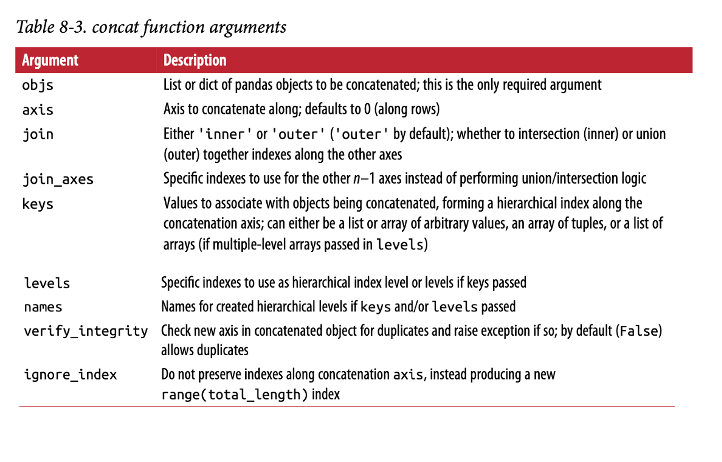

In [102]:
from IPython.display import Image
Image("img/picture53.png")

# Verileri Örtüşme ile Birleştirme
    Birleştirme veya birleştirme işlemi olarak ifade edilemeyen başka bir veri birleştirme durumu vardır. Dizinleri tamamen veya kısmen çakışan iki veri kümeniz olabilir. Motive edici bir örnek olarak, if-else ifadesinin dizi odaklı eşdeğerini gerçekleştiren NumPy'nin where işlevini düşünün.

In [103]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])

In [104]:
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])

In [105]:
b[-1] = np.nan

In [106]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [107]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [108]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

    Seri, pandaların olağan veri hizalama mantığıyla birlikte bu işlemin eşdeğerini gerçekleştiren bir birleştirme_first yöntemine sahiptir.

In [109]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

    DataFrames ile, comb_first aynı şeyi sütun sütun yapar, böylece bunu, ilettiğiniz nesneden gelen verilerle çağıran nesnedeki eksik verilere "yama uygulamak" olarak düşünebilirsiniz.

In [110]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})

In [111]:
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})

In [112]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [113]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [114]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


# 8.3 Yeniden Şekillendirme ve Döndürme
    Tablo şeklindeki verileri yeniden düzenlemek için bir dizi temel işlem vardır. Bunlara alternatif olarak yeniden şekillendirme veya döndürme işlemleri adı verilir.

# Reshaping with Hierarchical Indexing
    Hiyerarşik indeksleme, bir DataFrame'deki verileri yeniden düzenlemek için tutarlı bir yol sağlar. İki temel eylem vardır:
    stack:
    Bu, verilerdeki sütunlardan satırlara "döner" veya döner
    
    unstack:
    Bu, satırlardan sütunlara döner
    Bu işlemleri bir dizi örnekle açıklayalım. Satır ve sütun indeksleri olarak dizi dizileri içeren küçük bir Veri Çerçevesi düşünün:

In [115]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))

In [116]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


    Bu verilerde yığın yöntemini kullanmak, sütunları satırlara döndürerek bir Seri oluşturur.

In [117]:
result = data.stack()

In [118]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

    Hiyerarşik olarak indekslenmiş bir Seriden, verileri tekrar Veri olarak yeniden düzenleyebilirsiniz.Frame with unstack:

In [119]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


    Varsayılan olarak en içteki seviye istiflenmemiş durumdadır (yığınla aynıdır). Bir seviye numarası veya adı geçerek farklı bir seviyeyi kaldırabilirsiniz.

In [120]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [121]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


    Seviyedeki tüm değerler alt grupların her birinde bulunmazsa, yığının kaldırılması eksik verileri ortaya çıkarabilir.

In [122]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])

In [123]:
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])

In [124]:
data2 = pd.concat([s1, s2], keys=['one', 'two'])

In [125]:
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [126]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


    Yığınlama, eksik verileri varsayılan olarak filtreler, böylece işlem daha kolay tersine çevrilebilir.

In [127]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [128]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [129]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

    Bir DataFrame'de yığınlamayı kaldırdığınızda, yığınlanmamış düzey en düşük düzey olur
sonuç:

In [130]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))

In [131]:
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [132]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

    Yığını çağırırken, yığılacak eksenin adını belirtebiliriz.

In [133]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

# Pivoting “Long” to “Wide” Format
    Veritabanlarında ve CSV'de birden çok zaman serisini depolamanın yaygın bir yolu, uzun veya yığılmış biçimdedir.

In [134]:
data = pd.read_csv('examples/macrodata.csv')

In [135]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [136]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')

In [137]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')

In [138]:
data = data.reindex(columns=columns)

In [139]:
data.index = periods.to_timestamp('D', 'end')

In [140]:
ldata = data.stack().reset_index().rename(columns={0: 'value'})

    Şimdi, ldata şöyle görünür:

In [141]:
ldata[:10]

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


    Bu, çoklu zaman serileri veya iki veya daha fazla tuşa sahip diğer gözlemsel veriler için sözde uzun formattır (burada, anahtarlarımız tarih ve maddedir). Tablodaki her satır tek bir gözlemi temsil eder.

    Sabit bir şema (sütun adları ve veri türleri), tabloya veri eklendikçe öğe sütunundaki farklı değerlerin sayısının değişmesine izin verdiğinden, veriler MySQL gibi ilişkisel veritabanlarında sıklıkla bu şekilde depolanır. Önceki örnekte, tarih ve öğe genellikle hem ilişkisel bütünlük hem de daha kolay birleştirmeler sunan birincil anahtarlar olacaktır (ilişkisel veritabanı sözlüğünde). Bazı durumlarda, verilerle bu formatta çalışmak daha zor olabilir; Tarih sütunundaki zaman damgalarına göre dizine alınan her farklı öğe değeri için bir sütun içeren bir DataFrame'e sahip olmayı tercih edebilirsiniz. Data Frame’in pivot yöntemi tam olarak şu dönüşümü gerçekleştirir:

In [142]:
pivoted = ldata.pivot('date', 'item', 'value')

In [143]:
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


    Aktarılan ilk iki değer sırasıyla satır ve sütun dizini olarak kullanılacak sütunlar, ardından son olarak DataFrame'i doldurmak için isteğe bağlı bir değer sütunudur. Aynı anda yeniden şekillendirmek istediğiniz iki değer sütununuz olduğunu varsayalım

In [144]:
ldata['value2'] = np.random.randn(len(ldata))

In [145]:
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,1.194086
1,1959-03-31 23:59:59.999999999,infl,0.000,-0.197643
2,1959-03-31 23:59:59.999999999,unemp,5.800,-0.906974
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,-0.207346
4,1959-06-30 23:59:59.999999999,infl,2.340,0.016003
5,1959-06-30 23:59:59.999999999,unemp,5.100,1.218104
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,-0.212278
7,1959-09-30 23:59:59.999999999,infl,2.740,-1.218607
8,1959-09-30 23:59:59.999999999,unemp,5.300,-0.540738
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,1.306979


    Son bağımsız değişkeni atlayarak, hiyerarşik sütunlara sahip bir DataFrame elde edersiniz.

In [146]:
pivoted = ldata.pivot('date', 'item')

In [147]:
pivoted[:5]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -0.197643  1.194086   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  0.016003 -0.207346   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3 -1.218607 -0.212278   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -1.012934  1.306979   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2  0.437570  0.092416   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999 -0.906974  
1959-06-30 23:59:59.999999999  1.218104  
1959-09-30 23:59:59.999999999 -0.540738  
1959-12-31 23:59:59.999999999  0.614581  
1960-03-31 23:59:59.999999999  1.930479

In [148]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


    Pivotun, set_index kullanarak hiyerarşik bir dizin oluşturmaya eşdeğer olduğunu ve ardından bir yığın yığınını kaldırma çağrısı ile eşdeğer olduğunu unutmayın.

In [149]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')

In [150]:
unstacked[:7]

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -0.197643  1.194086   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1  0.016003 -0.207346   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3 -1.218607 -0.212278   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -1.012934  1.306979   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2  0.437570  0.092416   
1960-06-30 23:59:59.999999999  0.14  2834.390   5.2 -1.879514 -1.241695   
1960-09-30 23:59:59.999999999  2.70  2839.022   5.6 -0.246986 -0.023288   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999 -0.906974  
1959-06-30 23:59:59.999999999  1.218104  
1959-09-30 23:59:59.999999999 -0.540738  
1959-12-31 23:59:59.999999999  0.614581  
1960-03-31 23:59:59.999999999  1.930479  
1960-06-30 23:59:59.999999999 -0.271091  
1960-09-30 23:59:59.999999999 -0.253302

# Pivoting “Wide” to “Long” Format
    DataFrames için ters dönme işlemi pandas.melt'dir. Yeni bir DataFrame'de bir sütunu çok sayıda sütuna dönüştürmek yerine, birden çok sütunu tek bir sütuna birleştirerek girdiden daha uzun bir DataFrame oluşturur. Bir örneğe bakalım:

In [151]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                    'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})

In [152]:
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


    'Anahtar' sütunu bir grup göstergesi olabilir ve diğer sütunlar veri değerleridir. Pandas.melt kullanırken, hangi sütunların (varsa) grup göstergesi olduğunu belirtmeliyiz. Buradaki tek grup göstergesi olarak 'key'i kullanalım:

In [153]:
melted = pd.melt(df, ['key'])

In [154]:
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


    Pivot kullanarak, orijinal düzene geri dönebiliriz.

In [155]:
reshaped = melted.pivot('key', 'variable', 'value')

In [156]:
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


    Pivotun sonucu, satır etiketleri olarak kullanılan sütundan bir dizin oluşturduğundan, verileri bir sütuna geri taşımak için reset_index'i kullanmak isteyebiliriz.

In [157]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


    Değer sütunları olarak kullanmak için bir sütun alt kümesi de belirtebilirsiniz.

In [158]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


    pandas.melt, herhangi bir grup tanımlayıcısı olmadan da kullanılabilir.

In [159]:
pd.melt(df, value_vars=['A', 'B', 'C'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [160]:
pd.melt(df, value_vars=['key', 'A', 'B'])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6
